# Exploratory Visualization (_Into Dust_, Dublin and Taiwan only)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as sps
import seaborn as sns
import sklearn

from pathlib import Path

## Retrieve and Subset Datasource

Retrieve all good trials for IDs that came from Javier's algorithm.

In [2]:
notebook_song_name = 'hallelujah'

In [3]:
data_root = Path('../../neural_nets/fastai/combine-dust-dublin-taiwan/data')

df_all = pd.read_csv(data_root / 'good_reaction_trials_categorified_no_impute.csv')

pd.set_option('display.max_columns', None)
df_all.describe()

,visual_impairments,musical_expertise,age,control_activity,control_tension,control_familiarity,control_engagement,control_positivity,control_like_dislike,song_chillsshiversthrills,song_activity,song_tension,song_familiarity,song_engagement,song_positivity,song_like_dislike,control_power,song_transcendence,song_sadness,song_wonder,song_joyfulactivation,song_tenderness,song_peacefulness,song_nostalgia,song_power,musicpref_rock,musicpref_world,musicpref_dance,musicpref_traditional_irish,musicpref_classical,musicpref_pop,musicpref_jazz,musicpref_hip_hop,personality_trusting,personality_artistic,personality_imagination,personality_reserved,personality_outgoing,personality_lazy,personality_stress,personality_nervous,personality_fault,personality_thorough,concentration,musicpref_folk,musicpref_hiphop
count,0.0,129.000000,183.000000,78.000000,78.000000,78.0,78.000000,78.000000,78.000000,84.000000,162.000000,174.000000,162.000000,162.000000,162.000000,162.000000,78.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,90.000000,183.000000,183.000000,183.000000,105.000000,183.000000,183.000000,183.000000,105.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,NaN,2.697674,26.901639,2.820513,3.294872,-1.0,2.897436,3.064103,2.871795,1.750000,3.407407,3.959770,1.925926,3.345679,3.283951,3.401235,3.102564,2.916667,3.083333,3.416667,1.750000,3.500000,3.750000,2.916667,3.277778,0.540984,0.218579,0.224044,0.171429,0.338798,0.688525,0.185792,0.238095,3.782051,2.282051,3.910256,3.102564,3.243590,3.615385,3.166667,3.769231,3.192308,3.153846,3.897436,0.064103,0.128205
std,NaN,1.065105,14.058400,1.053671,1.152174,0.0,1.223044,1.073164,1.342212,1.062788,1.066460,1.119244,1.238891,1.397962,1.155431,1.376195,1.146307,1.164500,1.240112,0.792961,0.753778,0.797724,0.965307,0.996205,1.332631,0.499685,0.414416,0.418095,0.378691,0.474600,0.464367,0.390006,0.427960,0.962241,1.267961,0.995912,1.179806,1.175352,1.229832,1.242292,1.115686,1.173934,1.140482,1.100056,0.246521,0.336482
min,NaN,1.000000,8.000000,1.000000,1.000000,-1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,NaN,2.000000,16.500000,2.000000,3.000000,-1.0,2.000000,2.000000,2.000000,1.000000,3.000000,4.000000,1.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,3.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,4.000000,0.000000,0.000000
50%,NaN,3.000000,24.000000,3.000000,3.000000,-1.0,3.000000,3.000000,3.000000,1.000000,4.000000,4.000000,1.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4.000000,4.000000,3.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,2.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000,0.000000,0.000000
75%,NaN,3.000000,32.000000,3.000000,4.000000,-1.0,4.000000,4.000000,4.000000,2.000000,4.000000,5.000000,3.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.250000,4.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,4.000000,3.000000,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,0.000000,0.000000
max,NaN,5.000000,81.000000,5.000000,5.000000,-1.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,4.000000,5.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000

In [4]:
print(f"Total N: {df_all.shape[0]}")

Total N: 183


In [5]:
df_reaction = df_all[df_all['critical_reaction'] == True]
df_no_reaction = df_all[df_all['critical_reaction'] == False]

In [6]:
print(f"Total reaction N: {df_reaction.shape[0]}")
print(f"Total no-reaction N: {df_no_reaction.shape[0]}")

Total reaction N: 83
Total no-reaction N: 100


In [7]:
df_all.columns

Index(['_id', 'location', 'sex', 'musical_background', 'nationality',
       'visual_impairments', 'musical_expertise', 'hearing_impairments', 'age',
       'critical_reaction', 'control_activity', 'control_tension',
       'control_familiarity', 'control_engagement', 'control_positivity',
       'control_like_dislike', 'song_chillsshiversthrills', 'song_activity',
       'song_tension', 'song_familiarity', 'song_engagement',
       'song_positivity', 'song_like_dislike', 'control_power',
       'song_transcendence', 'song_sadness', 'song_wonder',
       'song_joyfulactivation', 'song_tenderness', 'song_peacefulness',
       'song_nostalgia', 'song_power', 'song', 'musicpref_rock',
       'musicpref_world', 'musicpref_dance', 'musicpref_traditional_irish',
       'musicpref_classical', 'musicpref_pop', 'musicpref_jazz',
       'musicpref_hip_hop', 'language', 'personality_trusting',
       'personality_artistic', 'personality_imagination',
       'personality_reserved', 'personality_ou

In [8]:
def combine_personality(regular, inverted):
    return regular + ((-1. * (inverted - 3)) + 3)

In [9]:
personality_traits = {
    'extraversion': {'normal': 'personality_outgoing', 'inverted': 'personality_reserved'},
    'agreeableness': {'normal': 'personality_trusting', 'inverted': 'personality_fault'},
    'conscientiousness': {'normal': 'personality_thorough', 'inverted': 'personality_lazy'},
    'neuroticism': {'normal': 'personality_nervous', 'inverted': 'personality_stress'},
    'openness': {'normal': 'personality_imagination', 'inverted': 'personality_artistic'},
}

In [10]:
for t in personality_traits:
    df_all['personality_' + t] = combine_personality(df_all[personality_traits[t]['normal']], df_all[personality_traits[t]['inverted']])
    df_all = df_all.drop(labels=[personality_traits[t]['normal'], personality_traits[t]['inverted']], axis=1)

In [11]:
df_all.columns

Index(['_id', 'location', 'sex', 'musical_background', 'nationality',
       'visual_impairments', 'musical_expertise', 'hearing_impairments', 'age',
       'critical_reaction', 'control_activity', 'control_tension',
       'control_familiarity', 'control_engagement', 'control_positivity',
       'control_like_dislike', 'song_chillsshiversthrills', 'song_activity',
       'song_tension', 'song_familiarity', 'song_engagement',
       'song_positivity', 'song_like_dislike', 'control_power',
       'song_transcendence', 'song_sadness', 'song_wonder',
       'song_joyfulactivation', 'song_tenderness', 'song_peacefulness',
       'song_nostalgia', 'song_power', 'song', 'musicpref_rock',
       'musicpref_world', 'musicpref_dance', 'musicpref_traditional_irish',
       'musicpref_classical', 'musicpref_pop', 'musicpref_jazz',
       'musicpref_hip_hop', 'language', 'concentration', 'musicpref_folk',
       'musicpref_hiphop', 'personality_extraversion',
       'personality_agreeableness', 'p

In [12]:
cat_cols = []

ord_cols = ['song_activity', 'song_tension', 'song_positivity', 'song_engagement', 'song_power']

cont_cols = []

In [13]:
# nationality_counts = df_all['nationality'].value_counts()
# patches, texts = plt.pie(nationality_counts, 
#                                     explode=[0.1] * len(nationality_counts));

# labels = ['{}: {}'.format(x.capitalize(), nationality_counts[x]) for x in nationality_counts.index]

# plt.legend(patches, labels)
# plt.savefig('hallelujah_reaction_pie_nationalities_{}_new_split.pdf'.format(notebook_song_name))

In [14]:
# language_counts = df_all['language'].value_counts()
# patches, texts = plt.pie(language_counts, 
#                                     explode=[0.1] * len(language_counts));

# languages = list(language_counts.index)
# for i in range(len(languages)):
#     language = languages[i]
#     if language == 'en':
#         languages[i] = 'English'
#     elif language == 'zh_TW':
#         languages[i] = 'Taiwanese'

# labels = ['{}: {}'.format(languages[i].capitalize(), language_counts[x]) for i, x in enumerate(language_counts.index)]

# plt.legend(patches, labels)
# plt.savefig('hallelujah_reaction_pie_languages_{}_new_split.pdf'.format(notebook_song_name))

In [15]:
def mardia(data, unbiased_cov=True):
    """
    data should have observations in rows
    """
    import numpy as np
    import scipy.stats as sps
    
    n = data.shape[0]
    p = data.shape[1]

    S = np.cov(data, rowvar=False, bias=not unbiased_cov)

    data_scaled = (data - data.mean(axis=0))

    D = np.matmul(np.matmul(data_scaled, np.linalg.pinv(S, rcond=1e-25)), data_scaled.T)

    product = D * D * D
    skewness = np.sum(product) / n**2
    kurtosis = (D * D).diagonal().sum() / n
    df = p * (p + 1) * (p + 2) / 6
    k = ((p + 1)*(n + 1)*(n + 3))/(n*((n + 1)*(p + 1) - 6))
    
    skew, kurt, skew_p, kurt_p = None, None, None, None
    if n < 20:
        skew = n * k * skewness / 6.
    else:
        skew = n * skewness / 6.
    
    chi2_test_skew = sps.chi2(df)
    skew_p = 1. - chi2_test_skew.cdf(skew)
    
    skew_result = False
    if skew_p > 0.05:
        skew_result = True
    
    kurt = (kurtosis - p * (p + 2)) * np.sqrt(n / (8 * p * (p + 2)))
    
    normal_test_kurt = sps.norm()
    kurt_p = 2. * (1. - normal_test_kurt.cdf(np.abs(kurt)))
    
    kurt_result = False
    if kurt_p  > 0.05:
        kurt_result = True
    
    result_skewness = {
        'test': 'Mardia Skewness',
        'statistic': skew,
        'p-value': skew_p,
        'result': skew_result
    }
    
    result_kurtosis = {
        'test': 'Mardia Kurtosis',
        'statistic': kurt,
        'p-value': kurt_p,
        'result': kurt_result
    }
    
    result = {
        'test': 'MVN',
        'result': skew_result and kurt_result
    }
    
    return result_skewness, result_kurtosis, result

In [16]:
def run_tests(x_label, dist_var, bins=None, normed=False, kde=True, bw='normal_reference', x_lim=None, plots=False, print_output=False):
    
    if plots:
        f = plt.figure(figsize=(8, 4))
        sns.distplot(df_all[dist_var].dropna(), bins=bins, norm_hist=normed, kde=kde, rug=True, kde_kws={'bw': bw})
        plt.xlabel('')
        if x_lim is not None:
            plt.xlim([0.5, 5.5])

        g = sns.FacetGrid(df_all, hue='critical_reaction', height=4, aspect=2)
        g.map(sns.distplot, dist_var, bins=bins, norm_hist=normed, kde=kde, kde_kws={'bw': bw})
        g.set_xlabels(x_label)
        if x_lim is not None:
            g.axes[0,0].set_xlim([0.5, 5.5])
        g.fig.suptitle('Distribution of {} by reaction group'.format(dist_var), y=1.0)
        g.add_legend(title='Hallelujah Reaction');

        fig_file = 'hallelujah_reaction_distribution_hallelujah_{}_new_split.pdf'.format(dist_var)
        g.savefig(fig_file, orientation='landscape')
        
    mean_true = df_all[df_all['critical_reaction'] == True][dist_var].dropna()
    mean_false = df_all[df_all['critical_reaction'] == False][dist_var].dropna()
    
    all_normtest = sps.normaltest(df_all[dist_var])
    true_normtest = sps.normaltest(df_all[df_all['critical_reaction'] == True][dist_var])
    false_normtest = sps.normaltest(df_all[df_all['critical_reaction'] == False][dist_var])
    if print_output:
        print(f'All normal test results: {all_normtest}')
        print(f'Reaction normal test results: {true_normtest}')
        print(f'No-reaction normal test results: {false_normtest}')
    
    alpha = 0.05
    _, equal_variance_p = sps.levene(mean_true, mean_false)
    
    equal_var = None
    if equal_variance_p >= alpha:
        equal_var = True
    else:
        equal_var = False
    
    t_stat, t_p = sps.ttest_ind(mean_true, mean_false, equal_var=equal_var)
    u_stat, u_p = sps.mannwhitneyu(mean_true, mean_false, alternative='two-sided')

    if print_output:
        print('Student\'s t-test for difference in mean {} between Hallelujah Reaction groups'.format(x_label.capitalize()))

        print('T test statistic: {:.4f}'.format(t_stat))
        print('T test p-value: {:.4f}'.format(t_p))

        print('Mann-Whitney U test statistic: {:.4f}'.format(u_stat))
        print('Mann-Whitney U test p-value: {:.4f}'.format(u_p))

        if t_p <= alpha or u_p <= alpha:
            print('**** Significant Result ****')
    
    return {
        'mean_true': mean_true.mean(),
        'mean_false': mean_false.mean(),
        'median_true': mean_true.median(),
        'median_false': mean_false.median(),
        't_stat': t_stat,
        't_p': t_p,
        'u_stat': u_stat,
        'u_p': u_p
    }

In [17]:
# run_tests('Age [years]', 'age', bins=None, normed=False, kde=True, bw='normal_reference', x_lim=None, plots=True, print_output=True)

In [18]:
df_results = pd.DataFrame({})

for c in ord_cols:
    try:
        result = run_tests(c, c)
        df_results = pd.concat([df_results, pd.DataFrame(result, index=[c])])
    except:
        print(f'Could not run tests for {c}')

In [29]:
df_results = df_results.sort_values(by='u_p')

i = np.arange(1, df_results.shape[0] + 1)
m = len(i)
Q = 0.15
benjamini_hochberg = ((i * 1.) / m) * Q
df_results['bh_threshold'] = benjamini_hochberg
df_results['significant'] = df_results.u_p < df_results.bh_threshold

df_results

,mean_true,mean_false,median_true,median_false,t_stat,t_p,u_stat,u_p,bh_threshold,significant
song_activity,3.546667,3.287356,4.0,3.0,1.549855,0.123152,3754.5,0.083410,0.03,False
song_engagement,3.160000,3.505747,3.0,4.0,-1.561231,0.120601,2852.5,0.158677,0.06,False
song_positivity,3.160000,3.390805,3.0,3.0,-1.270161,0.205871,2890.5,0.197736,0.09,False
song_power,3.405405,3.188679,4.0,3.0,0.757314,0.450885,1080.5,0.403413,0.12,False
song_tension,3.987500,3.936170,4.0,4.0,0.300701,0.764006,4003.0,0.436473,0.15,False


In [21]:
# Chi-squared test of male/female proportions

cross = pd.crosstab(df_all['sex'], df_all['critical_reaction'])
display(cross)
chi2, p, dof, table = sps.chi2_contingency(cross)
print('Chi-squared test of sex vs hallelujah reaction proportions')
print('Test statistic: {:.4f}'.format(chi2))
print('p-value: {:.4f}'.format(p))
print('Degrees of freedom: {}'.format(dof))

critical_reaction,False,True
sex,,
female,39,40
male,61,43


Chi-squared test of sex vs hallelujah reaction proportions
Test statistic: 1.2101
p-value: 0.2713
Degrees of freedom: 1


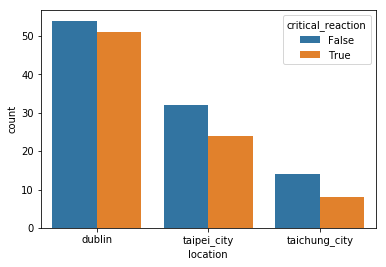

In [22]:
sns.countplot(x='location', hue='critical_reaction', data=df_all)

In [23]:
# Chi-squared test of location proportions

cross = pd.crosstab(df_all['location'], df_all['critical_reaction'])
display(cross)
chi2, p, dof, table = sps.chi2_contingency(cross)
print('Chi-squared test of location vs hallelujah reaction proportions')
print('Test statistic: {:.4f}'.format(chi2))
print('p-value: {:.4f}'.format(p))
print('Degrees of freedom: {}'.format(dof))

critical_reaction,False,True
location,,
dublin,54,51
taichung_city,14,8
taipei_city,32,24


Chi-squared test of location vs hallelujah reaction proportions
Test statistic: 1.2969
p-value: 0.5229
Degrees of freedom: 2


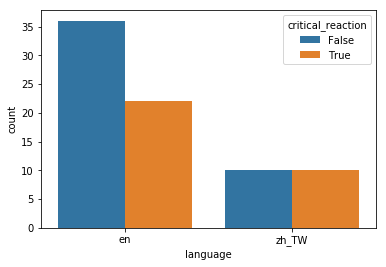

In [24]:
sns.countplot(x='language', hue='critical_reaction', data=df_all)

In [25]:
# Chi-squared test of language proportions

cross = pd.crosstab(df_all['language'], df_all['critical_reaction'])
display(cross)
chi2, p, dof, table = sps.chi2_contingency(cross)
print('Chi-squared test of language vs hallelujah reaction proportions (for Taiwanese, English, and NA)')
print('Test statistic: {:.4f}'.format(chi2))
print('p-value: {:.4f}'.format(p))
print('Degrees of freedom: {}'.format(dof))

critical_reaction,False,True
language,,
en,36,22
zh_TW,10,10


Chi-squared test of language vs hallelujah reaction proportions (for Taiwanese, English, and NA)
Test statistic: 0.4660
p-value: 0.4948
Degrees of freedom: 1


Sources for Hotelling's $T^2$:
- https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Hotellings_Two-Sample_T2.pdf
- https://onlinecourses.science.psu.edu/stat505/node/100/

In [26]:
def hotelling_t2(X_1, X_2, alpha):
    
    import scipy.stats as sps
    
    n_1 = len(X_1)
    n_2 = len(X_2)

    y_1 = X_1.mean().as_matrix()
    y_1 = y_1.reshape(len(y_1), -1)
    y_2 = X_2.mean().as_matrix()
    y_2 = y_2.reshape(len(y_2), -1)

    # Covariance matrices
    S_1 = np.cov(X_1.astype(np.float64).T)
    S_2 = np.cov(X_2.astype(np.float64).T)

    # Pooled variance
    S_pooled_num = ((n_1 - 1) * S_1) + ((n_2 - 1) * S_2)
    S_pooled_denom = n_1 + n_2 - 2
    S_pooled = S_pooled_num / S_pooled_denom
    
    T_2 = (n_1 * n_2) / (n_1 + n_2)
    T_2 = T_2 * np.matmul((y_1 - y_2).T, np.linalg.pinv(S_pooled))
    T_2 = np.matmul(T_2, (y_1 - y_2))
    T_2 = T_2.squeeze()
    
    p = len(X_1.columns)
    F_num = n_1 + n_2 - p - 1
    F_denom = p * (n_1 + n_2 - 2)
    F = (F_num / F_denom) * T_2
    F = F.squeeze()
    
    df_1 = p
    df_2 = n_1 + n_2 - p - 1
    F_dist = sps.f(df_1, df_2)
    p_value = F_dist.cdf(F)
    
    # Calculate effect size
    D_2 = ((n_1 + n_2) * T_2) / (n_1 * n_2)
    
    return({
        'T2': T_2,
        'F': F,
        'df': (df_1, df_2),
        'p': p_value,
        'D2': D_2
    })

# Pairwise Hotelling's $T^2$

In [27]:
import itertools

plot_vars = ord_cols + cont_cols

pairs = list(itertools.combinations(plot_vars, 2))

results = pd.DataFrame(columns=['p', 'adjustedP', 'F', 'T2', 'df1', 'df2', 'D2'])
total_tests = 0

for pair in pairs:
    test_vars = list(pair)
    test_vars.append('critical_reaction')
    df_pair = df_all[test_vars].dropna()
    df_pair_1 = df_pair[df_pair['critical_reaction'] == False].drop(['critical_reaction'], axis=1)
    df_pair_2 = df_pair[df_pair['critical_reaction'] == True].drop(['critical_reaction'], axis=1)
    
    if df_pair_1.shape[0] == 0 and df_pair_2.shape[0] == 0:
        continue
    
    mardia_result = mardia(df_pair.drop(['critical_reaction'], axis=1), unbiased_cov=True)

    if not mardia_result[2]['result']:
        continue

    t2_results = hotelling_t2(df_pair_1, df_pair_2, 0.05)
    p = t2_results['p']
    adjusted_p = p * len(pairs)
    if adjusted_p > 1:
        adjusted_p = 1
        
    row = pd.DataFrame(
        {
            'p': t2_results['p'], 
            'adjustedP': adjusted_p,
            'F': t2_results['F'], 
            'T2': t2_results['T2'], 
            'df1': t2_results['df'][0], 
            'df2': t2_results['df'][1],
            'D2': t2_results['D2']
        }, 
        index=[pair])

    results = pd.concat([results, row])
    
alpha = 0.05

results.adjustedP = results.p * results.shape[0]
    
with pd.option_context('display.max_rows', None, 'display.float_format', lambda x: '%.5f' % x):
#     display('Tests for difference between combined means of {} and {} between hallelujah reaction groups:'.format(pair[0], pair[1]))
    display(results.sort_values(by='p'))

results.to_csv('hotelling_comparisons_{}.csv'.format(notebook_song_name))

/home/paperspace/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/paperspace/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


,p,adjustedP,F,T2,df1,df2,D2
"(song_positivity, song_engagement)",0.72052,2.88208,1.28510,2.58637,2,159,0.06421
"(song_activity, song_power)",0.77179,3.08717,1.50699,3.05418,2,75,0.16184
"(song_activity, song_positivity)",0.91677,3.66708,2.52541,5.08260,2,159,0.12619
"(song_activity, song_engagement)",0.94401,3.77604,2.93547,5.90787,2,159,0.14668


In [28]:
sig_results = results[results.adjustedP <= .05]

if sig_results.shape[0] > 0:
    for pair in sig_results.index.values:
        g = sns.FacetGrid(df_all[[pair[0], pair[1], 'critical_reaction']], col='critical_reaction', height=6, aspect=1, margin_titles=True)
        g.set_titles()
        g.map(sns.kdeplot, pair[0], pair[1], cmap='Reds', shade=True, shade_lowest=False, alpha=0.8)
        g.savefig('hallelujah_reaction_distributions_{}_{}_{}_by_reaction.pdf'.format(notebook_song_name, pair[0], pair[1]))
else:
    print('No significant results to plot')

sig_results

No significant results to plot


,p,adjustedP,F,T2,df1,df2,D2
